# Trying to Win Jeopardy with Statistics

Jeopardy is a popular TV show in the US where participants answer questions to win money.

Imagine that you want to compete on Jeopardy, and you're looking for any way to win. In this project, you'll work with a dataset of Jeopardy questions to figure out some patterns in the questions that could help you win.

The dataset can be founf [here](https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/).

In [1]:
import pandas as pd
import numpy as np

In [2]:
jeopardy = pd.read_csv('jeopardy_csv.csv')

In [3]:
jeopardy.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [4]:
jeopardy.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

We remove the spaces in columns names:

In [5]:
jeopardy.columns = jeopardy.columns.str.replace(' ','')

In [6]:
jeopardy.columns

Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

## Cleaning and Normalizing Columns

### Normalizing Question and Answer columns.

We remove punctuation and convert to lower case.

In [7]:
jeopardy['clean_question'] = jeopardy['Question'].str.lower().str.replace('\W',' ')
jeopardy['clean_answer'] = jeopardy['Answer'].str.lower().str.replace('\W',' ')

In [8]:
jeopardy.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was ...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisl...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show th...,mcdonald s
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the co...,john adams


### Normalize the value column:

Remove the $ symbol or anything other than numbers and convert string to int

In [9]:
import re

def normalize_value(string):    
    string = re.sub('[^A-Za-z0-9\s]','', string)
    try:
        return int(string)
    except:
        return 0
         
        
jeopardy['Value_Clean'] = jeopardy['Value'].apply(normalize_value)    

In [10]:
jeopardy.head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer,Value_Clean
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was ...,copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisl...,jim thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show th...,mcdonald s,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the co...,john adams,200


### Convert date column into date type

In [11]:
jeopardy['AirDate_datetime'] = pd.to_datetime(jeopardy['AirDate'], format = '%Y-%m-%d')

In [12]:
jeopardy.head(10)

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer,Value_Clean,AirDate_datetime
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was ...,copernicus,200,2004-12-31
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisl...,jim thorpe,200,2004-12-31
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200,2004-12-31
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show th...,mcdonald s,200,2004-12-31
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the co...,john adams,200,2004-12-31
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,$200,"In the title of an Aesop fable, this insect sh...",the ant,in the title of an aesop fable this insect sh...,the ant,200,2004-12-31
6,4680,2004-12-31,Jeopardy!,HISTORY,$400,Built in 312 B.C. to link Rome & the South of ...,the Appian Way,built in 312 b c to link rome the south of ...,the appian way,400,2004-12-31
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$400,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan,no 8 30 steals for the birmingham barons 2 ...,michael jordan,400,2004-12-31
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$400,"In the winter of 1971-72, a record 1,122 inche...",Washington,in the winter of 1971 72 a record 1 122 inche...,washington,400,2004-12-31
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$400,This housewares store was named for the packag...,Crate & Barrel,this housewares store was named for the packag...,crate barrel,400,2004-12-31


In [13]:
jeopardy.dtypes

ShowNumber                   int64
AirDate                     object
Round                       object
Category                    object
Value                       object
Question                    object
Answer                      object
clean_question              object
clean_answer                object
Value_Clean                  int64
AirDate_datetime    datetime64[ns]
dtype: object

### What should you study to be able to answer the questions?

In order to figure out whether to study past questions, study general knowledge, or not study it all, it would be helpful to figure out two things:

- How often the answer can be used for a question.
- How often questions are repeated.

You can answer the second question by seeing how often complex words (> 6 characters) reoccur. You can answer the first question by seeing how many times words in the answer also occur in the question. We'll work on the first question and come back to the second.

In [14]:
def answer_in_question(row):
    split_answer = str(row['clean_answer']).split()
    split_question = str(row['clean_question']).split()
    match_count = 0
    
    try:
        split_answer.remove('the')
    except:
        pass
    
    if len(split_answer) == 0:
        return 0
    
    for word in split_answer:
        if word in split_question:
            match_count+=1
    return match_count  / len(split_answer) 


In [15]:
jeopardy['answer_in_question'] = jeopardy.apply(answer_in_question, axis = 1)

In [16]:
jeopardy[jeopardy['answer_in_question'] != 0].head()

,ShowNumber,AirDate,Round,Category,Value,Question,Answer,clean_question,clean_answer,Value_Clean,AirDate_datetime,answer_in_question
14,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$600,"On June 28, 1994 the nat'l weather service beg...",the UV index,on june 28 1994 the nat l weather service beg...,the uv index,600,2004-12-31,0.5
24,4680,2004-12-31,Jeopardy!,HISTORY,$1000,This Asian political party was founded in 1885...,the Congress Party,this asian political party was founded in 1885...,the congress party,1000,2004-12-31,0.5
31,4680,2004-12-31,Double Jeopardy!,AIRLINE TRAVEL,$400,It can be a place to leave your puppy when you...,a kennel,it can be a place to leave your puppy when you...,a kennel,400,2004-12-31,0.5
38,4680,2004-12-31,Double Jeopardy!,MUSICAL TRAINS,$800,"During the 1954-1955 Sun sessions, Elvis climb...","the ""Mystery Train""",during the 1954 1955 sun sessions elvis climb...,the mystery train,800,2004-12-31,0.5
53,4680,2004-12-31,Double Jeopardy!,MUSICAL TRAINS,$2000,"In 1961 James Brown announced ""all aboard"" for...","""Night Train""",in 1961 james brown announced all aboard for...,night train,2000,2004-12-31,0.5


In [17]:
jeopardy['answer_in_question'].mean()

0.0614146067204666

Dividing the number of times a word of the answer appears in the question we approximate what percentage of the question is made by the answer.

With around 6% of the question, there is a very small proportion of the answers that are contained in the question itself.

### Repetition of Questions

We check how often the questions are repeats of older ones. (This is actually not very precise because we only have 10% of the full Jeopardy dataset)

We start by sorting the rows by date. Then we create a set to store the terms used.

These terms are going to be the words in the questions that are longer than 6 characters. This way we filter many stopwords such as "the", "than" and similar.

The interesting words are added to the set and we count the number of times they appear as we iterate through the rows of the dataset.

In [18]:
jeopardy = jeopardy.sort_values(by='AirDate_datetime')

In [19]:
terms_used = set()

In [20]:
question_overlap = []

In [21]:
for index, row in jeopardy.iterrows():
    split_question = str(row['clean_question']).split(" ")
    split_question = [word for word in split_question if len (word) > 5]
    match_count = 0
    for word in split_question:
        if word in terms_used:
            match_count += 1
        terms_used.add(word)
    if len(split_question) > 0:
        match_count = match_count/len(split_question)
    question_overlap.append(match_count)
        
        
jeopardy['question_overlap'] = question_overlap


In [22]:
jeopardy['question_overlap'].mean()

0.8992046127830491

This number means that on average 90% of the long words of the split questions had already appeared in older episodes of jeopardy.

In [23]:
len(jeopardy[jeopardy['question_overlap'] >0]) / len(jeopardy)

0.9651085603650947

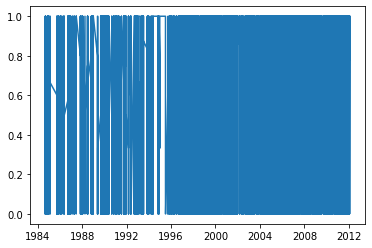

In [24]:
import matplotlib.pyplot as plt
plt.plot(jeopardy['AirDate_datetime'],jeopardy['question_overlap'])

### Classification of Questions: High and Low Value





In [25]:
def question_value(value):
    if value > 800:
        return 1
    else:
        return 0
    
    
jeopardy['high_value'] = jeopardy['Value_Clean'].apply(question_value)    

In [26]:
def high_value_count(word):
    low_count = 0
    high_count = 0
    
    for index, row in jeopardy.iterrows():
        split_question = str(row['clean_question']).split()
        if word in split_question:
            if row['high_value'] == 1:
                high_count += 1
            elif row['high_value'] == 0:
                low_count += 1
                
    return high_count, low_count


                
    

In [27]:
import random
comparison_terms =  random.choices(list(terms_used), k=10)

In [28]:
observed_expected = []

for comp_term in comparison_terms:
    observed_expected.append( high_value_count(comp_term) )                    

For instance, the first of the randomly picked term appears as many times as the first element of the first couple of observed_expected.

The list observed_expected is the observed frequency of each term in high value questions and low value questions respectively.

In [29]:
comparison_terms

['soundtracks',
 'smelly',
 'figments',
 'helpers',
 'motifs',
 'auerstadt',
 'rankin',
 'workforce',
 'primitives',
 'cassie']

In [30]:
observed_expected

[(1, 3),
 (7, 9),
 (0, 1),
 (3, 5),
 (1, 2),
 (0, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (1, 2)]

### Calculation of $\chi^2$ and checking Statistical Significance

For each randomly selected term we calculate its expected frequency.

We calculate the total number of appearances, this is already stored in observed_expected. The total is the sum of both values.

We divide this total by the number of questions we have available in the dataset. This gives us the percentage of questions that contain the current term.

We multiply this percentage to the number of high value questions to calculate which would be the expected number of high value questions containing this term.

We multiply this percentage to the number of low value questions to calculate which would be the expected number of low value questions containing this term.

With scipy.stats.chisquare function we calculate $\chi^2$ given the expected and observed counts, as well as p-value to test statistical significance.

In [40]:
from scipy.stats import chisquare

high_value_count = jeopardy['high_value'].sum()
low_value_count = len(jeopardy) - high_value_count

chi_squared = []

for hi_n_low in observed_expected:
    total = sum(hi_n_low)
    total_prop = total / len(jeopardy)
    expected_high = total_prop * high_value_count
    expected_low = total_prop * low_value_count
    
    expected = [expected_high, expected_low]
    observed = list(hi_n_low)   
    
    
    chi_squared.append(chisquare(observed, expected))
    

In [41]:
chi_squared

[Power_divergenceResult(statistic=0.021646150708492677, pvalue=0.8830323245068887),
 Power_divergenceResult(statistic=1.878194900928631, pvalue=0.17053945091601466),
 Power_divergenceResult(statistic=0.3949764642333513, pvalue=0.5296950912486695),
 Power_divergenceResult(statistic=0.3325724285547579, pvalue=0.5641482606927778),
 Power_divergenceResult(statistic=0.03723409388907139, pvalue=0.846989214486915),
 Power_divergenceResult(statistic=0.3949764642333513, pvalue=0.5296950912486695),
 Power_divergenceResult(statistic=0.9267728889671603, pvalue=0.3357028942299553),
 Power_divergenceResult(statistic=0.46338644448358013, pvalue=0.49604555208958945),
 Power_divergenceResult(statistic=0.46338644448358013, pvalue=0.49604555208958945),
 Power_divergenceResult(statistic=0.03723409388907139, pvalue=0.846989214486915)]

#### Statistical Significance

As we can see in the chi_squared list of (chisq, pvalue) pairs, none of the terms had a significant difference in usage between high value and low value rows.


Additionally, the frequencies were all lower than 9, so the chi-squared test isn't as valid. It would be better to run this test with only terms that have higher frequencies.

### Eliminating non-informative words

In [ ]:
stopwords = ["i", "me", "my", "myself", "we", "our", "ours", 
                 "ourselves", "you", "your", "yours", "yourself", "yourselves", 
                     "he", "him", "his", "himself", "she", "her", "hers", "herself", 
                         "it", "its", "itself", "they", "them", "their", "theirs", "themselves", 
                             "what", "which", "who", "whom", "this", "that", "these", "those", "am", 
                                 "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                                     "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if",
                                         "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
                                             "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", 
                                                 "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
                                                     "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such",
                                                         "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]